In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Walmart.csv to Walmart.csv


In [3]:
df = pd.read_csv("Walmart.csv")
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates()


In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week


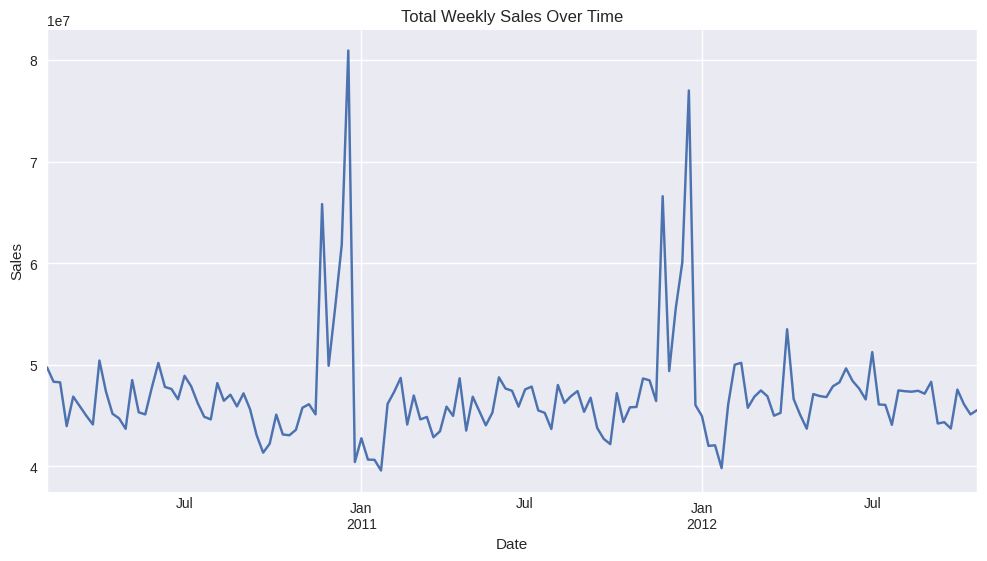

In [12]:
df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(12,6))
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Sales")
plt.show()


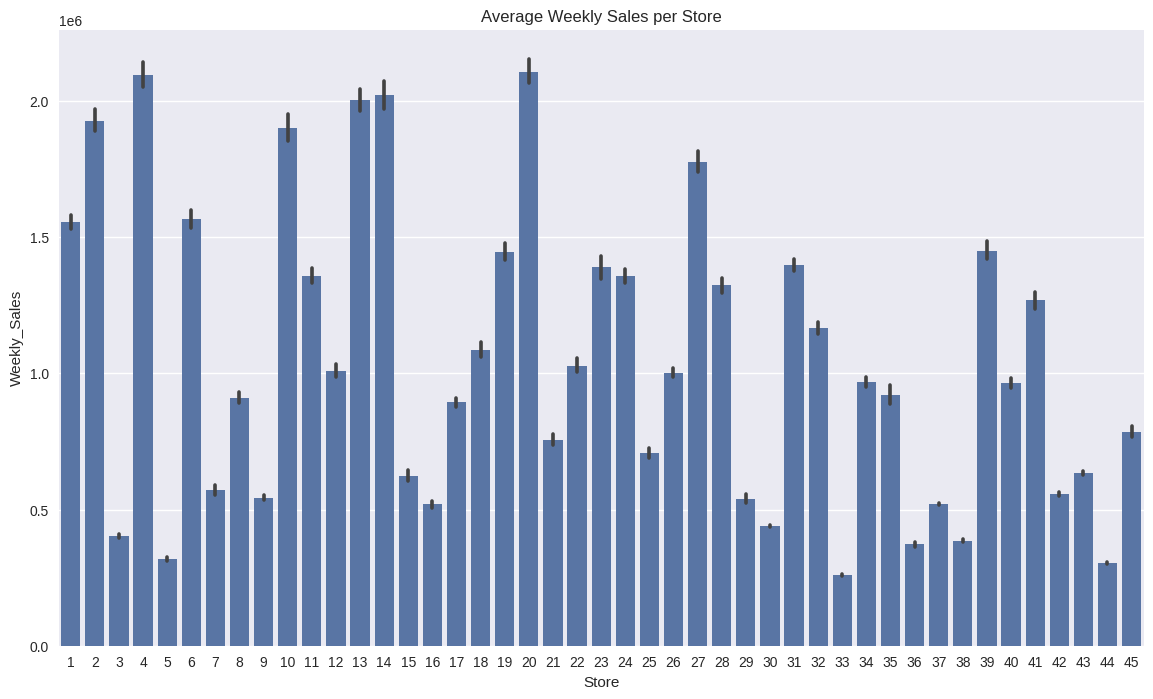

In [14]:
plt.figure(figsize=(14,8))
sns.barplot(data=df, x='Store', y='Weekly_Sales', estimator=np.mean)
plt.title("Average Weekly Sales per Store")
plt.show()


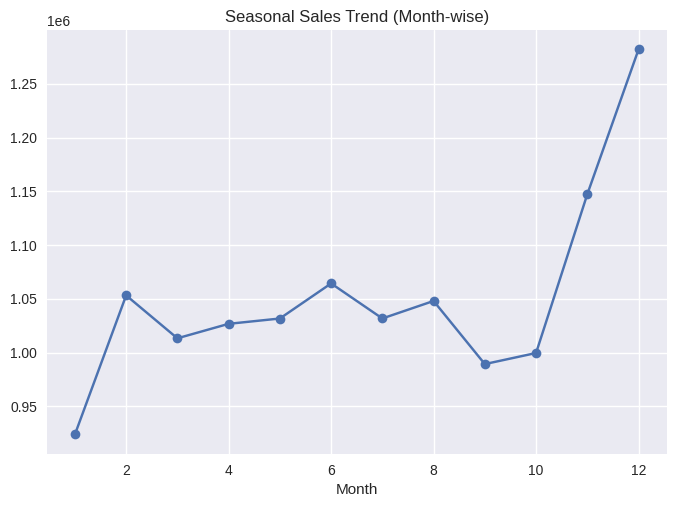

In [15]:
df.groupby('Month')['Weekly_Sales'].mean().plot(kind='line', marker='o')
plt.title("Seasonal Sales Trend (Month-wise)")
plt.show()


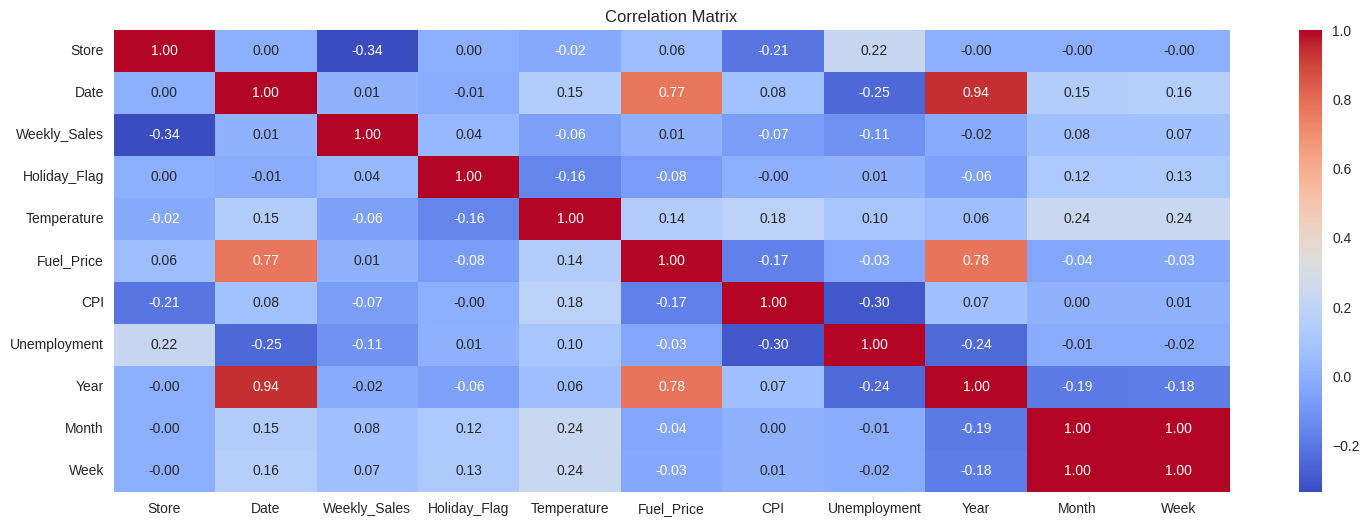

In [17]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


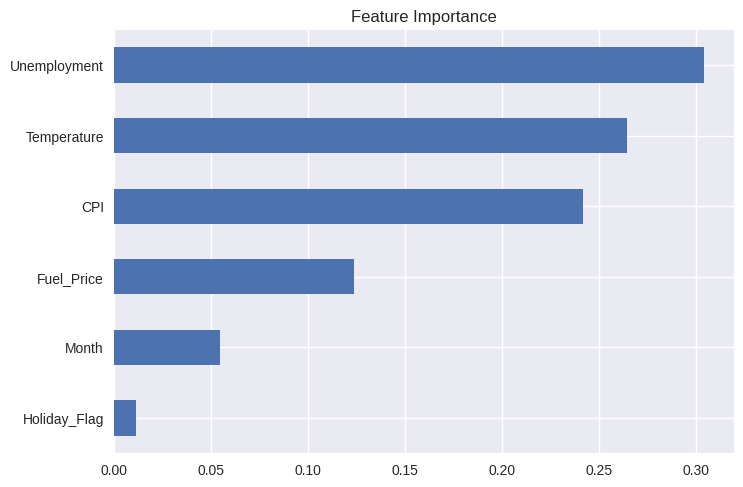

In [18]:
from sklearn.ensemble import RandomForestRegressor
df2 = df.dropna()
X = df2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag', 'Month']]
y = df2['Weekly_Sales']

model = RandomForestRegressor()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()
